Hyperparameters and Model Validation 
    Thinking About Model Validation
	Selecting the Best Model 
	Learning Curves
	Validation in Practice: Grid Search

Classification of gender (female/ male)
1.Choose a class of model
2.Choose model hyperparameters
3.Fit the model to the training data
4.Use the model to predict labels for new data

Model and choic of hyperparameter:


#  Thinking About Model Validation

Model , HP, -> Model is predicting good ot not


In [3]:
#Model validation the wrong way

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)

#Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)
#TP = 104, TN= 61 , FN=3 , FP = 3 
# (104 + 61) / (104 + 3 + 61 + 3) = 165 / 171 = 0.96
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

#Cons: It is not reliable for imbalanced dataset 

#Sln : AUC (Area under ROC Curve)


1.0

Gender class ->ML Model -> Passing a image -> predict 

Over 90% - Very good  
Between 70% and 90% - Good
Between 60% and 70% - OK
Below 60% - Poor

Classification metrics
    F1 score:
    What is F1 score?
    F1 score (also known as F-measure, or balanced F-score) is an error metric which measures model performance by calculating the harmonic mean of precision and recall for the minority positive class.
    
    F1 score = 2 * (Precision * recall)/(precision +recall)
    
    eg: from sklearn.metrics import f1_score
        y_true = [0, 1, 0, 0, 1, 1]
        y_pred = [0, 0, 1, 0, 0, 1]
        f1 = f1_score(y_true, y_pred)
        
F1 score	Interpretation
> 0.9	Very good
0.8 - 0.9	Good
0.5 - 0.8	OK 
< 0.5	Not good
        
A model will obtain a high F1 score if both Precision and Recall are high
A model will obtain a low F1 score if both Precision and Recall are low
A model will obtain a medium F1 score if one of Precision and Recall is low and the other is high
        
        
      i)Confusion matrix -> display the performance of model
      True , False 
      Positive or Negative
      
      1.True Positive: This combination tells us how many times a model correctly classifies a positive sample as Positive? 
      2.False Negative: This combination tells us how many times a model incorrectly classifies a positive sample as Negative?
      3.False Positive: This combination tells us how many times a model incorrectly classifies a negative sample as Positive?
      4.True Negative: This combination tells us how many times a model correctly classifies a negative sample as Negative?
      
      
    1. Precision 
        Precision = True Positive/(True Positive + False Positive)  
                  =TP/TP+FP  
                  
         eg: TP = 2
         FP =1
         
         Precision = 2/2+1 = 2/3 = 0.66
         
         1 -> 100% -> outstanding
         0.75 -> Reasonable value but not outstanding
         < 0.75 -> Improve 
        eg:
        from sklearn.metrics import precision_score
        y_true = [0, 1, 2, 0, 1, 2]
        y_pred = [0, 2, 1, 0, 0, 1]
        precision_score(y_true, y_pred)
         
         
    2. Recall 
        Recall = True Positive/(True Positive + False Negative  )
               =TP/TP+FN  
               
           TP = 2
           FN= 1
           Recall = 2/2+1 =2/3= 0.66
           
           0.75 -> good
           <0.75 -> improve
           1- outstanding 
           0 -> bad
           
           eg:
           from sklearn.metrics import recall_score
            y_true = [0, 1, 2, 0, 1, 2]
            y_pred = [0, 2, 1, 0, 0, 1]
            recall_score(y_true, y_pred)
            
            
    
    AUC score - Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    
    from sklearn.metrics import roc_auc_score
    y_true = [0,1,1,0,0,1]
    y_pred = [0,0,1,1,0,1]
    auc = roc_auc_score(y_true, y_pred)
    
    AUC score	Interpretation
    >0.8	Very good performance
    0.7-0.8	Good performance
    0.5-0.7	OK performance
    0.5	As good as random choice
    
    How can I improve my AUC score?
    To improve your AUC score there are three things that you could do:
    1.Add more features to your dataset which provide some signal for the target
    2.Tweak your model by adjusting parameters or the type of model used
    3.Change the probability threshold at which the classes are chosen
    
    Balanced accuracy
    Baseline metrics
    Classification metrics for imbalanced data
    
    


In [7]:
#Model validation the right way
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)
model.fit(X1, y1)
y2_model = model.predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
print(accuracy_score(y2, y2_model))
print(accuracy_score(y1, y1_model))

0.9066666666666666
0.96


In [ ]:
#Selecting the Best Model

#Use a more complicated/more flexible model
#Use a less complicated/less flexible model
#Gather more training samples
#Gather more data to add features to each sample


In [16]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

np.random.seed(0)
X, y = load_iris(return_X_y=True)
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

train_scores, valid_scores = validation_curve(
    Ridge(), X, y, param_name="alpha", param_range=np.logspace(-7, 3, 3),
    cv=5)
print(train_scores)
print(valid_scores)


[[0.93402178 0.94366418 0.92648383 0.91933313 0.92922507]
 [0.9340217  0.94366412 0.92648377 0.91933304 0.929225  ]
 [0.51143526 0.52415737 0.49868907 0.47086988 0.49623503]]
[[0.9055033  0.84185935 0.94569793 0.96231017 0.93366144]
 [0.90550088 0.84184574 0.94568969 0.96233172 0.93366806]
 [0.46706558 0.25698974 0.50496293 0.49826404 0.52500014]]


In [17]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(
    SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)
print(train_sizes)
print(train_scores)
print(valid_scores)

[ 50  80 110]
[[0.98       0.98       0.98       0.98       0.98      ]
 [0.9875     1.         0.9875     0.9875     0.9875    ]
 [0.98181818 1.         0.98181818 0.98181818 0.99090909]]
[[1.         0.93333333 1.         1.         0.96666667]
 [1.         0.96666667 1.         1.         0.96666667]
 [1.         0.96666667 1.         1.         0.96666667]]


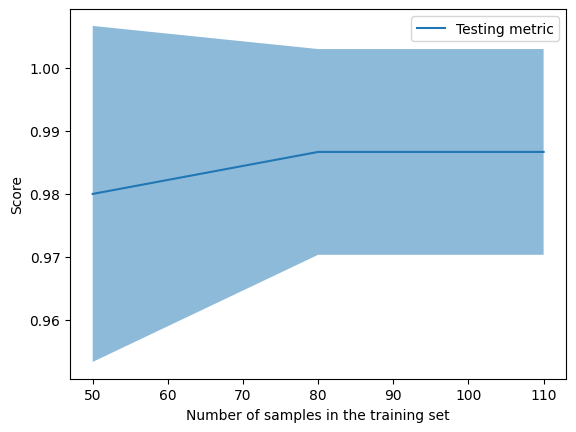

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0)
LearningCurveDisplay.from_estimator(
   SVC(kernel="linear"), X, y, train_sizes=[50, 80, 110], cv=5)

Feature Engineering	
    Categorical Features -> non-numerical data
	Text Features
	Image Features - Implementation check Day 19 jup file
	Derived Features
	Imputation of Missing Data
    Feature Pipelines

In [26]:
# Categorical Features -> non-numerical data
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]
#{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};
#Convert the non numerical data to num

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
print(vec.fit_transform(data))
print(vec.get_feature_names_out())
vec2 = DictVectorizer(sparse=True, dtype=int)
print(vec2.fit_transform(data))
print(vec2.get_feature_names_out())

[[     0      1      0 850000      4]
 [     1      0      0 700000      3]
 [     0      0      1 650000      3]
 [     1      0      0 600000      2]]
['neighborhood=Fremont' 'neighborhood=Queen Anne'
 'neighborhood=Wallingford' 'price' 'rooms']
  (0, 1)	1
  (0, 3)	850000
  (0, 4)	4
  (1, 0)	1
  (1, 3)	700000
  (1, 4)	3
  (2, 2)	1
  (2, 3)	650000
  (2, 4)	3
  (3, 0)	1
  (3, 3)	600000
  (3, 4)	2
['neighborhood=Fremont' 'neighborhood=Queen Anne'
 'neighborhood=Wallingford' 'price' 'rooms']


In [31]:
#Text Features

sample = ['problem of evil',
          'evil queen',
          'horizon problem']
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
print(X)
import pandas as pd
m=pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
print(m)

  (0, 3)	1
  (0, 2)	1
  (0, 0)	1
  (1, 0)	1
  (1, 4)	1
  (2, 3)	1
  (2, 1)	1
   evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0


In [32]:
#term frequency-inverse document frequency (TF–IDF) 

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
n=pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
print(n)

       evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000


In [ ]:
#Image Features -> Use pixels to calculate the feature , Scikit -learn , skicit-image

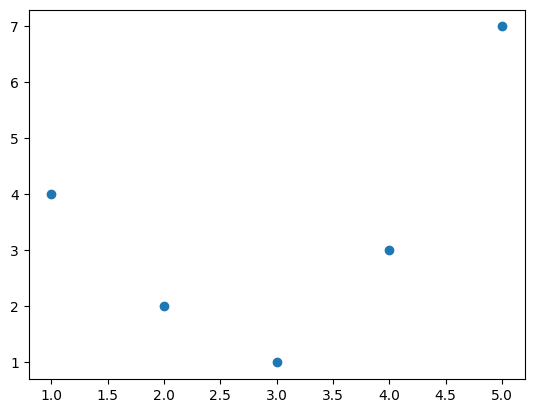

In [33]:
#Derived features
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

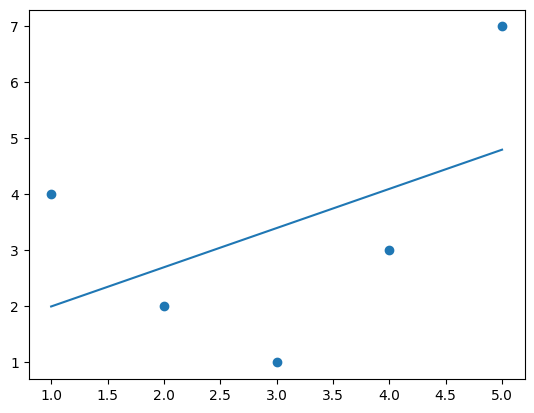

In [34]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


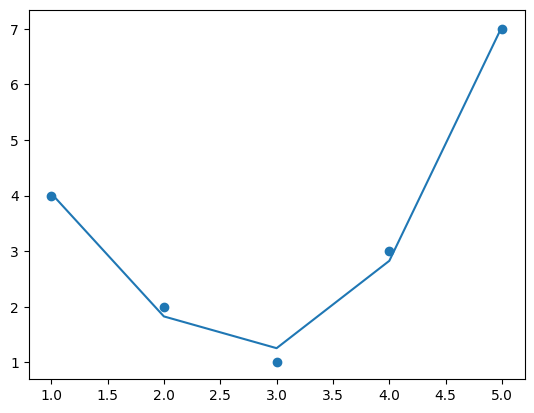

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

In [42]:
#Imputation of Missing Data
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
print(X2)
model = LinearRegression().fit(X2, y)
model.predict(X2)


[[4.5 0.  3. ]
 [3.  7.  9. ]
 [3.  5.  2. ]
 [4.  5.  6. ]
 [8.  8.  1. ]]


array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [ ]:
#Feature Pipelines
#1.Impute missing values using the mean
#2.Transform features to quadratic
#3.Fit a linear regression


In [45]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())
model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
